# Building the system

This section will focus on the construction of an initial molecular structure, which can be done using a number of ways:

- Specify the structure using the simplified molecular-input line-entry system ([SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)) line notation, and employ a program which can build the molecule from this

- Downloading a structure from the protein data bank ([PDB](https://www.rcsb.org/))

- Using a graphical molecular editor, such as [Avogadro](https://avogadro.cc/)


In [1]:
import py3Dmol as p3d
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import SVG

# Using SMILES


In this section we will focus on the first option, using the [RDkit](https://www.rdkit.org/) package. For a full description of how a molecule is written using SMILES can be found on, *e.g.*, the [wiki](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) entry --- here we will just illustrate some of the basic commands. Remember to make sure to visualize the resulting geometries and ensure they correspond to what you are interested in.

As a first example, we obtain the SMILES string of caffeine from [wikipedia](https://en.wikipedia.org/wiki/Caffeine) and construct a force-field optimized structure expressed xyz-coordinates.

In [2]:
def smilestoxyz(smiles, opt = True, return_noH = False):
    mol_bare = Chem.MolFromSmiles(smiles)
    mol_full = Chem.AddHs(mol_bare)
    AllChem.EmbedMolecule(mol_full)
    if opt: AllChem.UFFOptimizeMolecule(mol_full)
    if return_noH:
        return Chem.MolToXYZBlock(mol_full), Chem.RemoveHs(mol_full)
    return Chem.MolToXYZBlock(mol_full)

caffeine_xyz = smilestoxyz('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In `smilestoxyz` we:

1. Build the molecule, excluding implicit atoms (hydrogens)
2. Add hydrogens
3. Generate conformer
4. Optimize using the Universal Force Field (UFF) [optional] 
5. Return the xyz-coordinates, and [optional] the RDfit object without hydrogens

We can visualize the structure using py3Dmol:

In [3]:
viewer = p3d.view(width=300, height=200)
viewer.addModel(caffeine_xyz, 'xyz')
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Print the xyz-coordinates:

In [5]:
print(caffeine_xyz)

24

C      3.263017    0.665602   -0.212720
N      2.130944   -0.255164   -0.199731
C      2.169427   -1.598733   -0.377053
N      0.942209   -2.179661   -0.328611
C      0.122902   -1.131387   -0.108457
C      0.826777    0.020965   -0.033402
C      0.176416    1.232141    0.162798
O      0.830662    2.309769    0.212003
N     -1.194119    1.221596    0.291480
C     -1.895573    0.031642    0.181110
O     -3.158218    0.040671    0.233363
N     -1.232449   -1.164517    0.007067
C     -1.967842   -2.428192   -0.134534
C     -1.923424    2.489165    0.463343
H      4.214642    0.108953   -0.348684
H      3.149265    1.386854   -1.048964
H      3.309011    1.216933    0.749769
H      3.081659   -2.156591   -0.545352
H     -1.328558   -3.298924    0.124931
H     -2.841765   -2.451853    0.551042
H     -2.320805   -2.537641   -1.181510
H     -2.839017    2.343970    1.075630
H     -2.209018    2.891819   -0.531182
H     -1.306144    3.242585    0.997663



This structure looks close to the actual equilibrium geometry, and in the next section we will discuss how to (further) [optimize the structure](wf_struct) using higher-level theory.


If you want a 2D-representation, call the `smilestoxyz` with `return_noH = True`, and then make the figure using functionalities from RDfit:

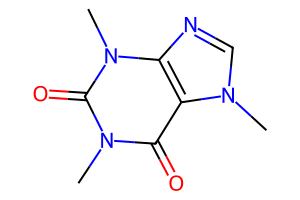

In [73]:
caffeine_xyz, caffeine_noH = smilestoxyz('CN1C=NC2=C1C(=O)N(C(=O)N2C)C', return_noH = True)

drawer = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(300,200)
drawer.DrawMolecule(caffeine_noH)
drawer.FinishDrawing()
display(SVG(drawer.GetDrawingText()))

Note that the image will look somewhat different each time, as the initial conformer and UFF optimized structure will have different orientations, which will affect the projection to 2D --- this is particularly the case for larger molecules extending in all three directions. Still, for many molecules this will work well, and you can save the .svg-figure with right-click save.


## Bond type

The basic principle of SMILES is to start at a suitable part of the molecule, and build the full molecule by sequentially describing the connections of each atom/functional group in turn. Hydrogens are typically added implicitly, and thus do not need to be specified. As such, the first four alkanes can simply be written with an increasing number of `C`:

In [7]:
methane_xyz = smilestoxyz('C')
ethane_xyz = smilestoxyz('CC')
propane_xyz = smilestoxyz('CCC')
butane_xyz = smilestoxyz('CCCC')

viewer = p3d.view(viewergrid=(2, 2), width=500, height=300, linked=False)
viewer.addModel(methane_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(ethane_xyz, 'xyz', viewer=(0, 1))
viewer.addModel(propane_xyz, 'xyz', viewer=(1, 0))
viewer.addModel(butane_xyz, 'xyz', viewer=(1, 1))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Bond types are specified with different symbols between two atoms, with `-`, `#`, and `#`, for single-, double-, and triple-bonds, respectively, and other bond types are possible (see, *e.g.*, [wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)). Single bonds is assumed if no bond type is specified.

For example, ethane, ethene, and ethyne are constructed as:

In [8]:
ethane_xyz = smilestoxyz('C-C') # or 'CC'
ethene_xyz = smilestoxyz('C=C')
ethyne_xyz = smilestoxyz('C#C')

viewer = p3d.view(viewergrid=(1, 3), width=400, height=200, linked=False)
viewer.addModel(ethane_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(ethene_xyz, 'xyz', viewer=(0, 1))
viewer.addModel(ethyne_xyz, 'xyz', viewer=(0, 2))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Branching and substitutions

Branches are given within paranthesis, as connected to the atom just before the paranthesis. These branches can be nested, for more complex molecules.

```{note}
Several valid SMILES strings can typically be written for the same molecule.
```


Hexane and 3-ethylheptane are then written as:

In [50]:
hexane_xyz = smilestoxyz('CCCCCCCC')
ethylheptane_xyz = smilestoxyz('CCCC(CC)CC')

viewer = p3d.view(viewergrid=(1, 2), width=500, height=200, linked=False)
viewer.addModel(hexane_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(ethylheptane_xyz, 'xyz', viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Substitutions are done by replacing the relevant atom, or adding it to replace an implicit hydrogen. For example, methanol, 1,1-difluoroethene, and 1,2-difluoroethene can be given as:

In [9]:
methanol_xyz = smilestoxyz('CO')
difluoro11_xyz = smilestoxyz('C=C(F)F')
difluoro12_xyz = smilestoxyz('FC=CF')

viewer = p3d.view(viewergrid=(1, 3), width=400, height=200, linked=False)
viewer.addModel(methanol_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(difluoro11_xyz, 'xyz', viewer=(0, 1))
viewer.addModel(difluoro12_xyz, 'xyz', viewer=(0, 2))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### UFF optimization

Following the construction of a conformer in RDkit, it is generally advised to perform a short UFF (universal force field) optimization to obtain a structure close to a local minima.

As an example, for ethanol the initial conformer will have the OH-group with any rotation to CH$_3$, and following a UFF optimization it takes on the staggered conformation:

In [10]:
ethanol_initial_xyz = smilestoxyz('CO', opt=False)
ethanol_xyz = smilestoxyz('CO')

viewer = p3d.view(viewergrid=(1, 2), width=400, height=200, linked=False)
viewer.addModel(ethanol_initial_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(ethanol_xyz, 'xyz', viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Ring systems

Ring systems are constructed by labeling part(s) of the ring and then closing the ring by having the SMILES string go back to the labeled atom(s). This can be performed several time, so that, *e.g.* cyclohexane and norbornane are written as:

In [11]:
cyclohexane_xyz = smilestoxyz('C1CCCCC1')
norborane_xyz = smilestoxyz('C1C2CCC(C2)C1')

viewer = p3d.view(viewergrid=(1, 2), width=400, height=200, linked=False)
viewer.addModel(cyclohexane_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(norborane_xyz, 'xyz', viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Aromatic rings can be written by using the aromatic bond symbole (`:`) or using lower-case for for the contributing atoms. For example, p-cymene can be written as both:

In [12]:
pcymene1_xyz = smilestoxyz('C=C(C)C1:C:C:C(C):C:C1')
pcymene2_xyz = smilestoxyz('C=C(C)c1ccc(C)cc1')

viewer = p3d.view(viewergrid=(1, 2), width=500, height=200, linked=False)
viewer.addModel(pcymene1_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(pcymene1_xyz, 'xyz', viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.setStyle({"stick": {}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## More complex systems

For more complex molecules, the easiest option is to check if wikipedia or other digital resources provide the SMILES string. This will work for many common molecules, and for the rest you can either consult more detailed guides on using SMILES and go from there, or use a graphical interface.

```{note}
No matter which option is chosen, we stress that you should always check that the structure you obtain is reasonably close to what is sought. For some systems you may need to sample many different conformers, and for PDB-files you might have to add hydrogens.
```